# Credit Risk Analysis
## AI Pioneers

### Here, we´ll analyze a dataset containing several variables, and it´s outcome is the person credit status (default/ non default), we´ll compare different ML aproaches and select the best fit to solve the problem.
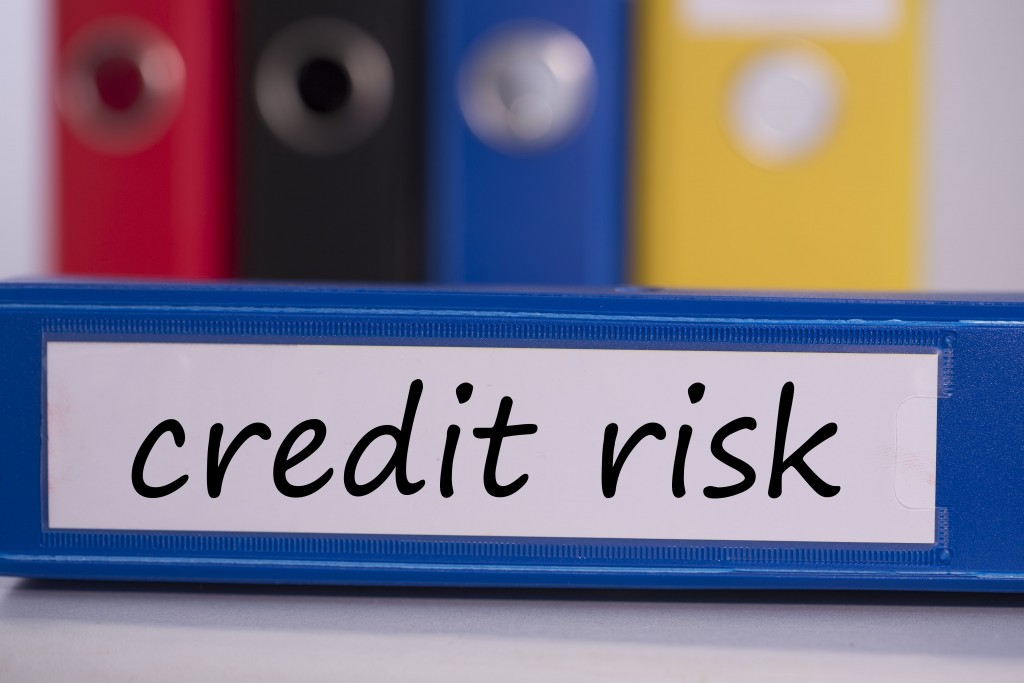


### Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
plt. style. use ('ggplot')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression


### Data processing

In [82]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
print(f"We have {df.shape[1]-1} variables and {df.shape[0]} registers in the dataset.\n")
df.head()

We have 11 variables and 32581 registers in the dataset.



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


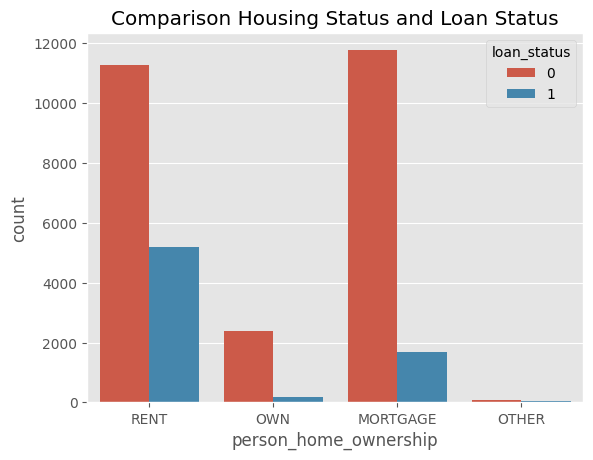

In [83]:
housing = df['person_home_ownership'].unique()
sns.countplot(x='person_home_ownership',order = housing, data = df,hue='loan_status')
plt.title("Comparison Housing Status and Loan Status");

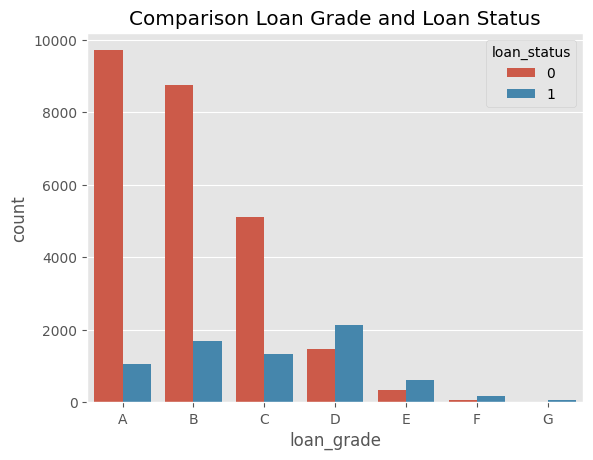

In [84]:
grades = sorted(df['loan_grade'].unique())
sns.countplot(x='loan_grade',order = grades, data = df,hue='loan_status')
plt.title("Comparison Loan Grade and Loan Status");

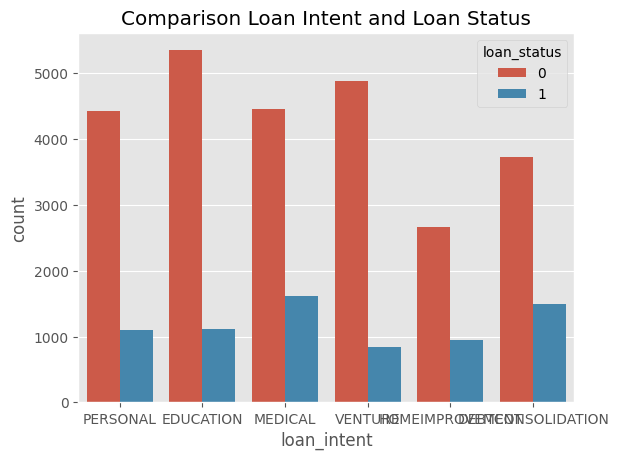

In [85]:
intent = df['loan_intent'].unique()
sns.countplot(x='loan_intent',order = intent, data = df,hue='loan_status')
plt.title("Comparison Loan Intent and Loan Status");

In [86]:
df = pd.get_dummies(df, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]) 
df.dropna(inplace=True)

In [87]:
df.shape

(28638, 27)

In [88]:
# Define our X and Y data, loan_status is our target variable.
Y = df["loan_status"]
X = df.drop(columns=["loan_status"])

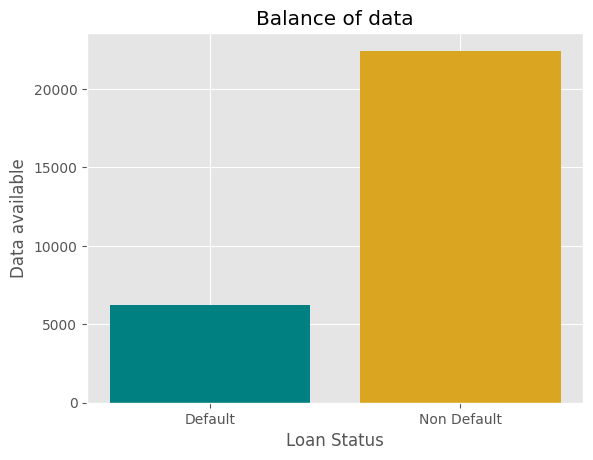

In [89]:
ones = sum(Y)
zeros = len(Y)-ones
plt.bar(["Default","Non Default"],[ones, zeros], color= ["teal", "goldenrod"]);
plt.title("Balance of data");
plt.xlabel("Loan Status");
plt.ylabel("Data available");

In [90]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE()
X, Y = smote.fit_resample(X, Y)

In [91]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,Y ,random_state=10, test_size=0.2) 

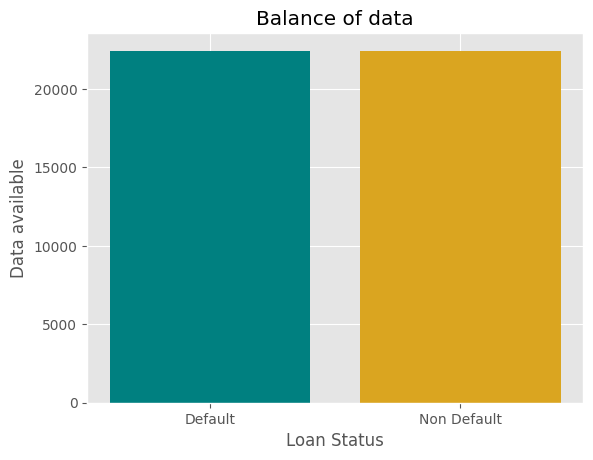

In [92]:
# Check if the data is balanced or not
ones = sum(Y)
zeros = len(Y)-ones
plt.bar(["Default","Non Default"],[ones, zeros], color= ["teal", "goldenrod"]);
plt.title("Balance of data");
plt.xlabel("Loan Status");
plt.ylabel("Data available");

In [93]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,0.57,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True


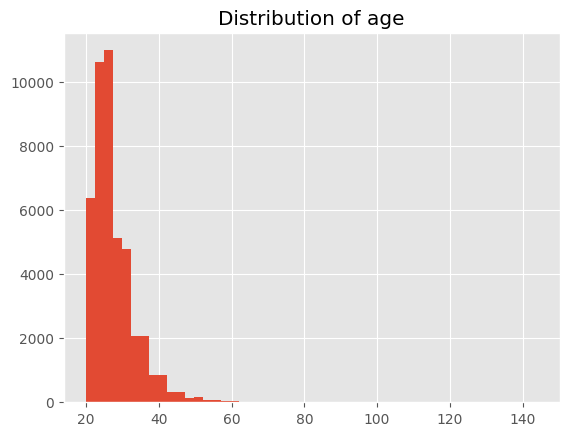

In [94]:
plt.hist(X.person_age, bins = 50);
plt.title("Distribution of age");

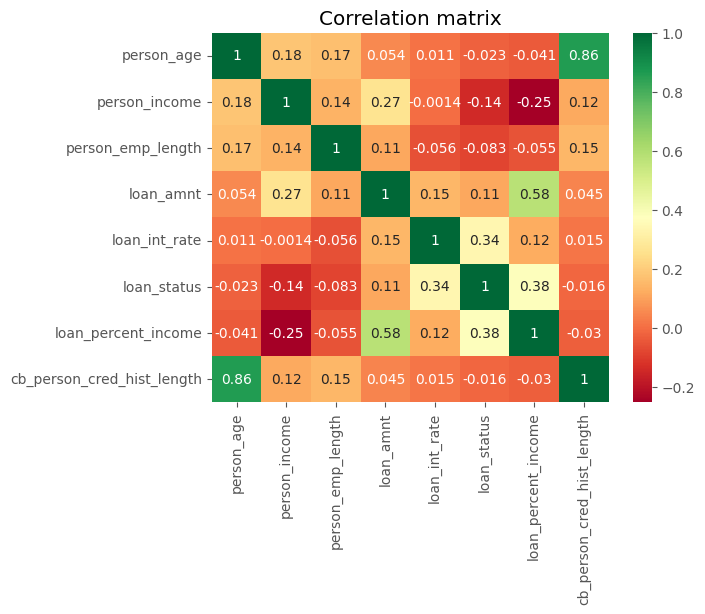

In [95]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap="RdYlGn");
plt.title("Correlation matrix");

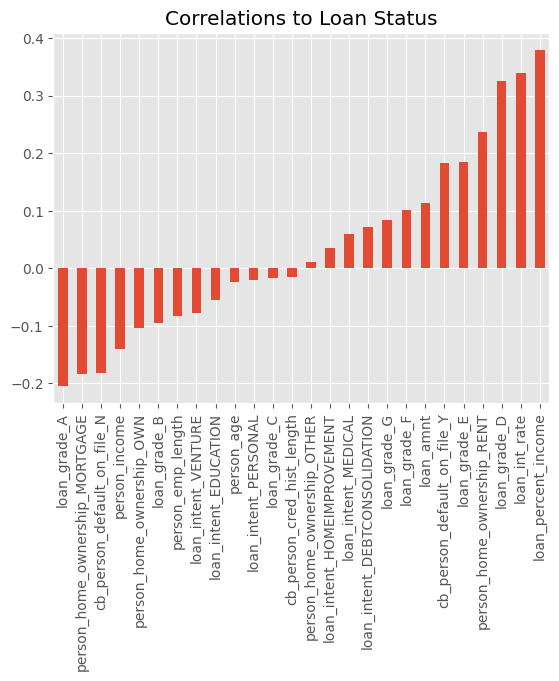

In [96]:
df.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')
plt.title("Correlations to Loan Status");

In [97]:
X.apply(pd.to_numeric)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.000000,35000,16.020000,0.590000,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.000000,1000,11.140000,0.100000,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.000000,5500,12.870000,0.570000,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.000000,35000,15.230000,0.530000,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.000000,35000,14.270000,0.550000,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44865,22,30000,3.000000,3500,14.236551,0.120000,4,False,False,False,...,True,False,False,True,True,False,False,False,True,False
44866,24,34000,1.609856,15557,11.614045,0.453901,3,True,False,False,...,False,False,False,True,True,False,False,False,True,True
44867,30,102339,3.481780,25000,15.190919,0.214818,8,False,False,False,...,True,False,False,True,True,False,False,False,True,True
44868,25,64879,1.571604,23120,11.835257,0.353627,4,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [98]:
model1 = LogisticRegression(C=1e5, class_weight='balanced')
model1.fit(X, Y)

LogisticRegression(C=100000.0, class_weight='balanced')

In [99]:
y_pred = model1.predict(X)

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.65      0.69     22435
           1       0.69      0.77      0.73     22435

    accuracy                           0.71     44870
   macro avg       0.72      0.71      0.71     44870
weighted avg       0.72      0.71      0.71     44870



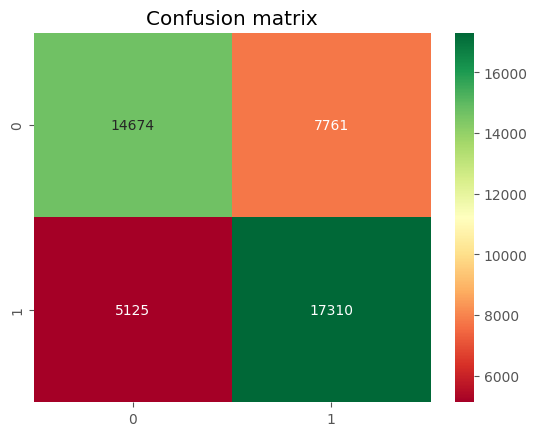

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(Y, y_pred),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(Y,y_pred))

Text(0.5, 1.0, 'Comparison actual vs predicted Y´s')

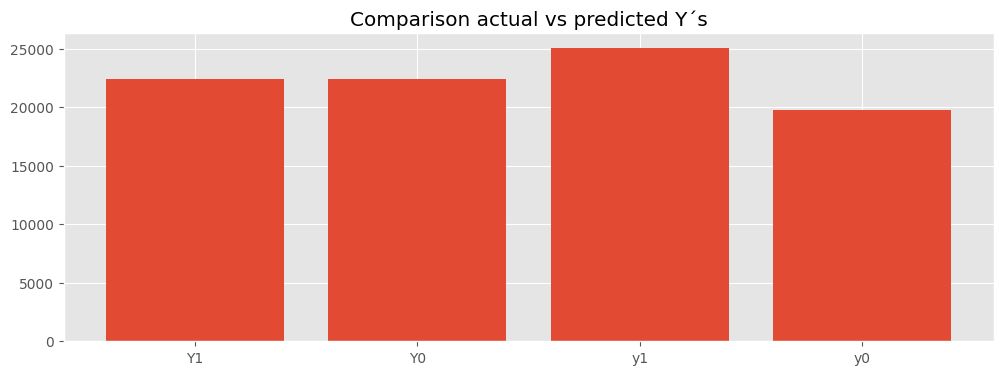

In [101]:
plt.figure(figsize=(12, 4))
plt.bar(["Y1","Y0","y1","y0"],[len(Y[Y==1]),len(Y[Y==0]),len(y_pred[y_pred==1]), len(y_pred[y_pred==0])], label="example data")
plt.title("Comparison actual vs predicted Y´s")

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     22435
           1       0.96      0.82      0.88     22435

    accuracy                           0.89     44870
   macro avg       0.90      0.89      0.89     44870
weighted avg       0.90      0.89      0.89     44870



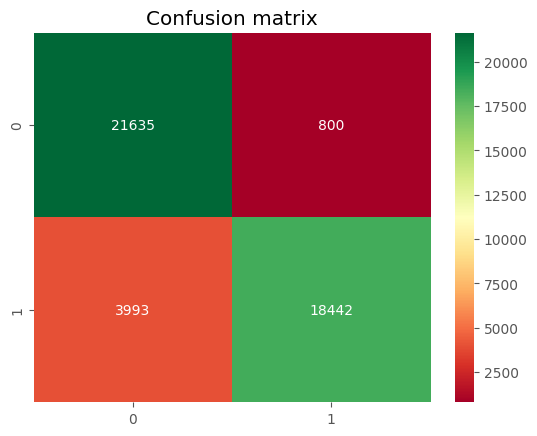

In [102]:
def get_binary(Y):
    y_binary = []
    for value in Y:
        y_binary.append(1) if value>0.5 else y_binary.append(0)
    return y_binary
model2 = LinearRegression()
model2.fit(X, Y)
y_pred = model2.predict(X) 
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(Y, get_binary(y_pred)),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(Y,get_binary(y_pred)))

In [103]:
from sklearn.linear_model import Ridge
model3 = Ridge(alpha = 0.5)
model3.fit(X, Y)

Ridge(alpha=0.5)

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     22435
           1       0.96      0.82      0.88     22435

    accuracy                           0.89     44870
   macro avg       0.90      0.89      0.89     44870
weighted avg       0.90      0.89      0.89     44870



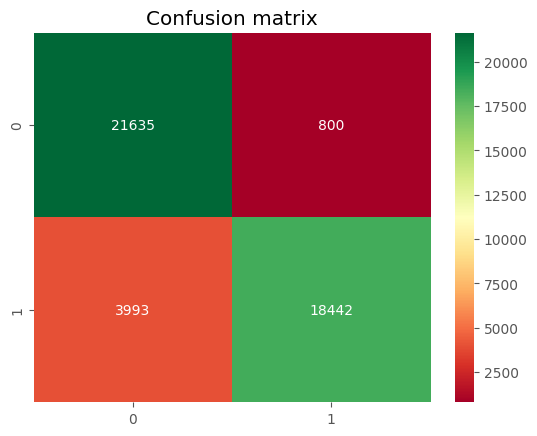

In [104]:
y_pred = model3.predict(X) 
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(Y, get_binary(y_pred)),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(Y,get_binary(y_pred)))

## Next step: Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=15, random_state=10)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, random_state=10)

#### Train set

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17867
           1       1.00      1.00      1.00     18029

    accuracy                           1.00     35896
   macro avg       1.00      1.00      1.00     35896
weighted avg       1.00      1.00      1.00     35896



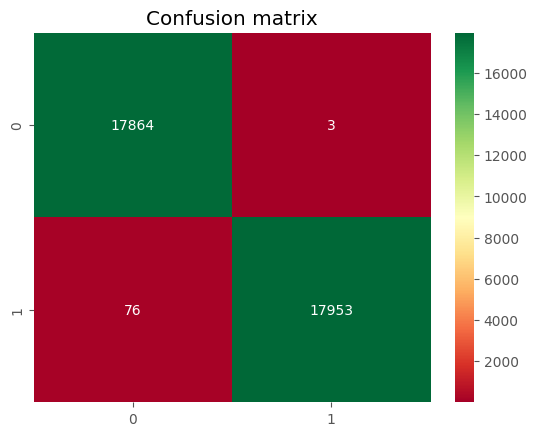

In [106]:
ytrain_pred = model4.predict(X_train) 
sns.heatmap(confusion_matrix(y_train, ytrain_pred),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(y_train,ytrain_pred))

#### Test set

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      4568
           1       0.98      0.92      0.95      4406

    accuracy                           0.95      8974
   macro avg       0.96      0.95      0.95      8974
weighted avg       0.96      0.95      0.95      8974



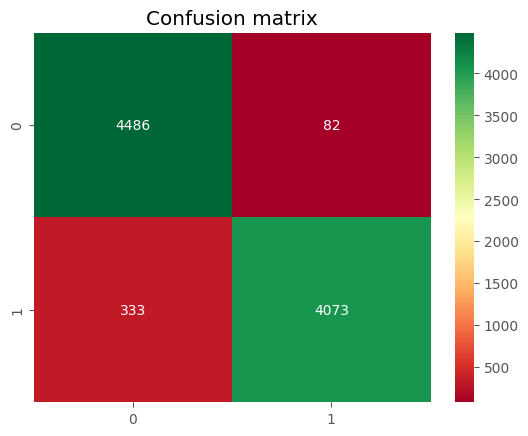

In [107]:
ytest_pred = model4.predict(X_test) 
sns.heatmap(confusion_matrix(y_test, ytest_pred),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(y_test,ytest_pred))

Text(0.5, 1.0, 'ROC Curve for Random Forest')

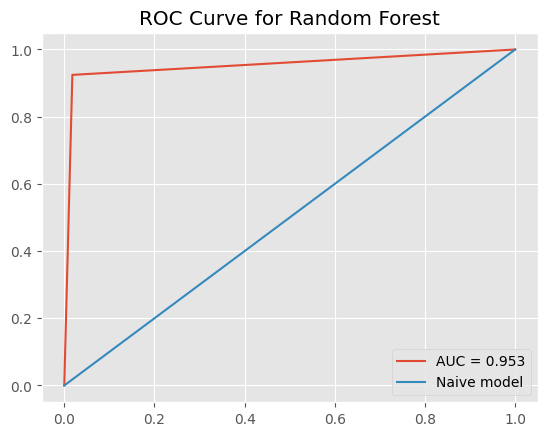

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresh = roc_curve(y_test, ytest_pred)
aucknn = roc_auc_score(y_test, ytest_pred)
plt.plot(fpr, tpr, label=f'AUC = {str(round(aucknn,3))}')
plt.plot([0,1],[0,1], label="Naive model");
plt.legend()
plt.title("ROC Curve for Random Forest")

In [109]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()

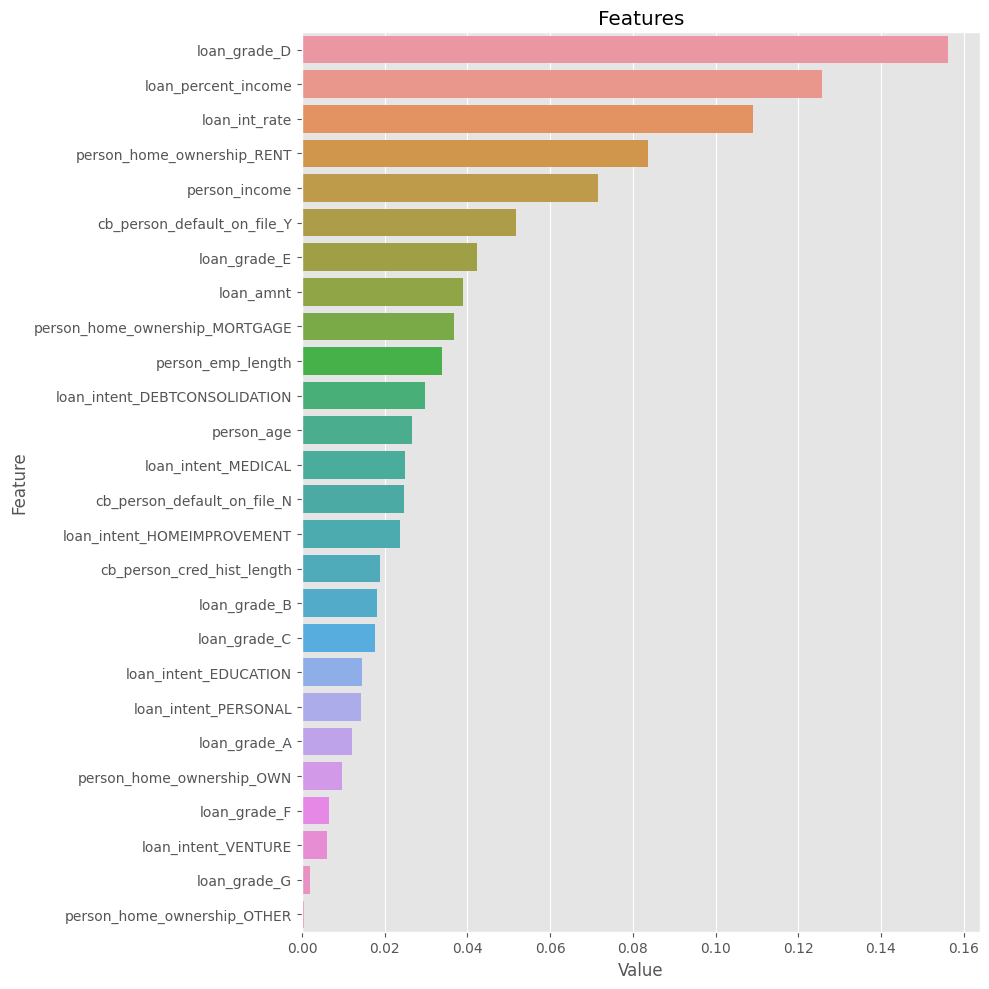

In [110]:
plot_importance(model4, X_train)

### Xboost

In [111]:
from xgboost import XGBClassifier
model5 = XGBClassifier(n_estimators = 12, random_state = 10, gamma = 0.05)
model5.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4568
           1       0.98      0.89      0.93      4406

    accuracy                           0.94      8974
   macro avg       0.94      0.94      0.94      8974
weighted avg       0.94      0.94      0.94      8974



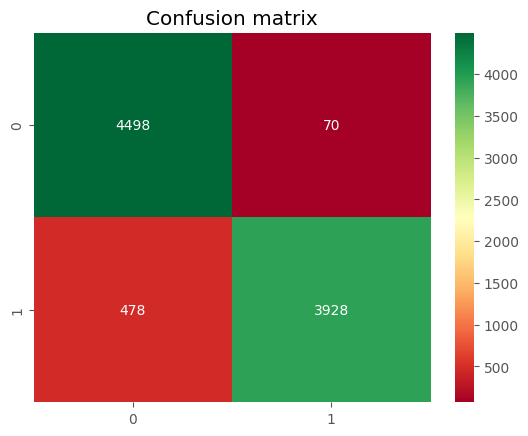

In [112]:
ytest_pred = model5.predict(X_test) 
sns.heatmap(confusion_matrix(y_test, ytest_pred),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(y_test,ytest_pred))

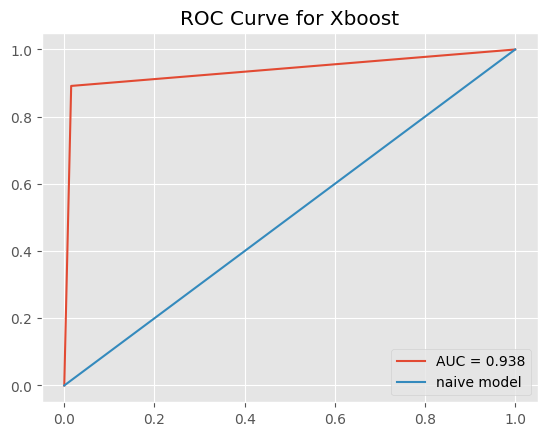

In [113]:
def plot_auc(model, y_test, y_test_pred, name):
    fpr, tpr, thresh = roc_curve(y_test, ytest_pred)
    aucknn = roc_auc_score(y_test, ytest_pred)
    plt.plot(fpr, tpr, label=f'AUC = {str(round(aucknn,3))}')
    plt.plot([0,1],[0,1], label="naive model");
    plt.legend()
    plt.title(f"ROC Curve for {name}")
    plt.show()
plot_auc(model5,y_test, ytest_pred, "Xboost")

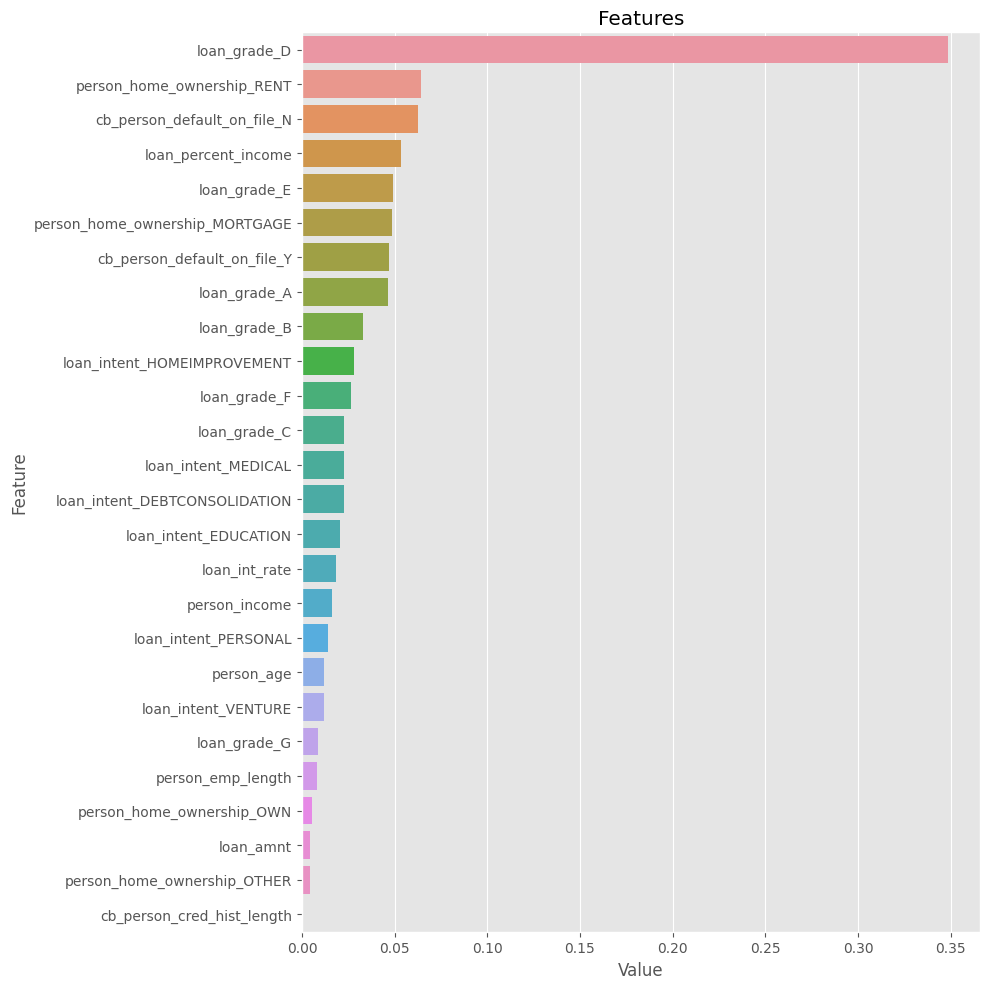

In [114]:
plot_importance(model5, X_train)

## Comparative


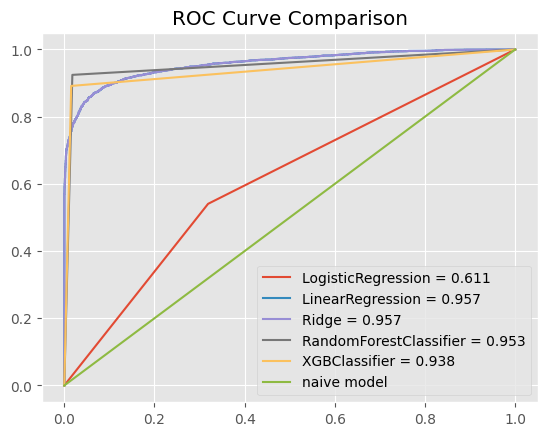

In [115]:
models = [model1,model2, model3,model4,model5]
for model in models:
    model.fit(X_train,y_train)
    ytest_pred = model.predict(X_test)
    fpr, tpr, thresh = roc_curve(y_test, ytest_pred)
    aucknn = roc_auc_score(y_test, ytest_pred)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} = {str(round(aucknn,3))}')
    plt.title(f"ROC Curve Comparison")
plt.plot([0,1],[0,1], label="naive model")
plt.legend();


## Neural Network

In [116]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7507 - loss: 1.4948 - val_accuracy: 0.9088 - val_loss: 0.2461
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8668 - loss: 0.3737 - val_accuracy: 0.8852 - val_loss: 0.2909
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8743 - loss: 0.3389 - val_accuracy: 0.9072 - val_loss: 0.2584
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8867 - loss: 0.3490 - val_accuracy: 0.8882 - val_loss: 0.2862
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8894 - loss: 0.3379 - val_accuracy: 0.9034 - val_loss: 0.2647
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.3681 - val_accuracy: 0.9187 - val_loss: 0.2517
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9004 - loss: 0.3296 - val_accuracy: 0.9109 - val_loss: 0.2493
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8936 - loss: 0.4176 - val_accuracy: 0.9199 - val_loss: 0.2

Text(0.5, 1.0, 'Accuracy Evolution')

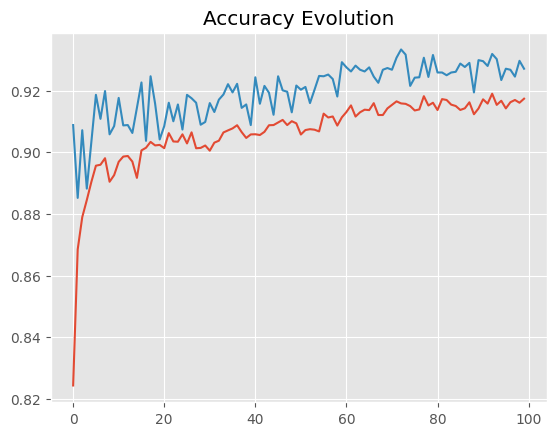

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(scaler.transform(X_train), y_train, epochs=100, batch_size = 456, validation_data=(scaler.transform(X_test), y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Evolution")